**Introduction**

The cryptocurrency market—especially Bitcoin—has gained significant attention from investors, analysts, and
 data scientists over the past decade. Due to its high volatility, massive trading volumes, and unpredictable behavior, Bitcoin presents a compelling case for machine learning–based analysis.

In this project, I explore the use of machine learning classification techniques to predict the future trend of Bitcoin prices. Rather than attempting to forecast the exact future price, the goal is to classify whether the price is likely to go up or down based on historical data.

After preprocessing and modeling the data, the classifier achieved an accuracy of approximately 59%, suggesting that there are patterns in past price movements that can provide some predictive insight. While the model isn't perfect, it offers a valuable starting point for building more sophisticated crypto price forecasting systems.

**Libraries used**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

**Dataset**

Reading the dataset and Exploratory Data Analysis (EDA)

In [2]:
df=pd.read_csv("bitcoin.csv")
df.head()

,Date,Open,High,Low,Close,Vol.
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K


In [3]:
df.shape

(3793, 6)

In [4]:
df.describe()

,Open,High,Low,Close
count,3793.000000,3793.000000,3793.000000,3793.000000
mean,11233.252307,11529.297996,10904.581545,11240.315766
std,15421.568722,15827.119004,14960.319732,15422.533996
min,13.300000,13.400000,13.200000,13.300000
25%,450.300000,459.600000,441.900000,451.400000
50%,5208.300000,5322.900000,5033.700000,5209.100000
75%,14976.200000,15648.300000,13902.300000,15043.000000
max,67528.700000,68990.600000,66334.900000,67527.900000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3793 entries, 0 to 3792
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3793 non-null   object 
 1   Open    3793 non-null   float64
 2   High    3793 non-null   float64
 3   Low     3793 non-null   float64
 4   Close   3793 non-null   float64
 5   Vol.    3793 non-null   object 
dtypes: float64(4), object(2)
memory usage: 177.9+ KB


**Display**

Bitcoin Price Trends Over the Years

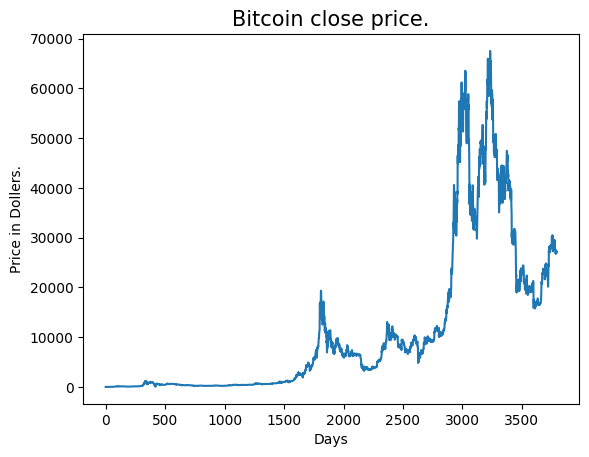

In [6]:
plt.close()
plt.Figure(figsize=(20,20))
plt.plot(df["Close"])
plt.title("Bitcoin close price.",fontsize=15)
plt.ylabel("Price in Dollers.")
plt.xlabel("Days")
plt.show()

**Cleaning data**

Identifying and summarizing  null values in the dataset

In [7]:
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
Vol.     0
dtype: int64

**Display**

Displaying the Price Range Where Price Compression Has Occurred

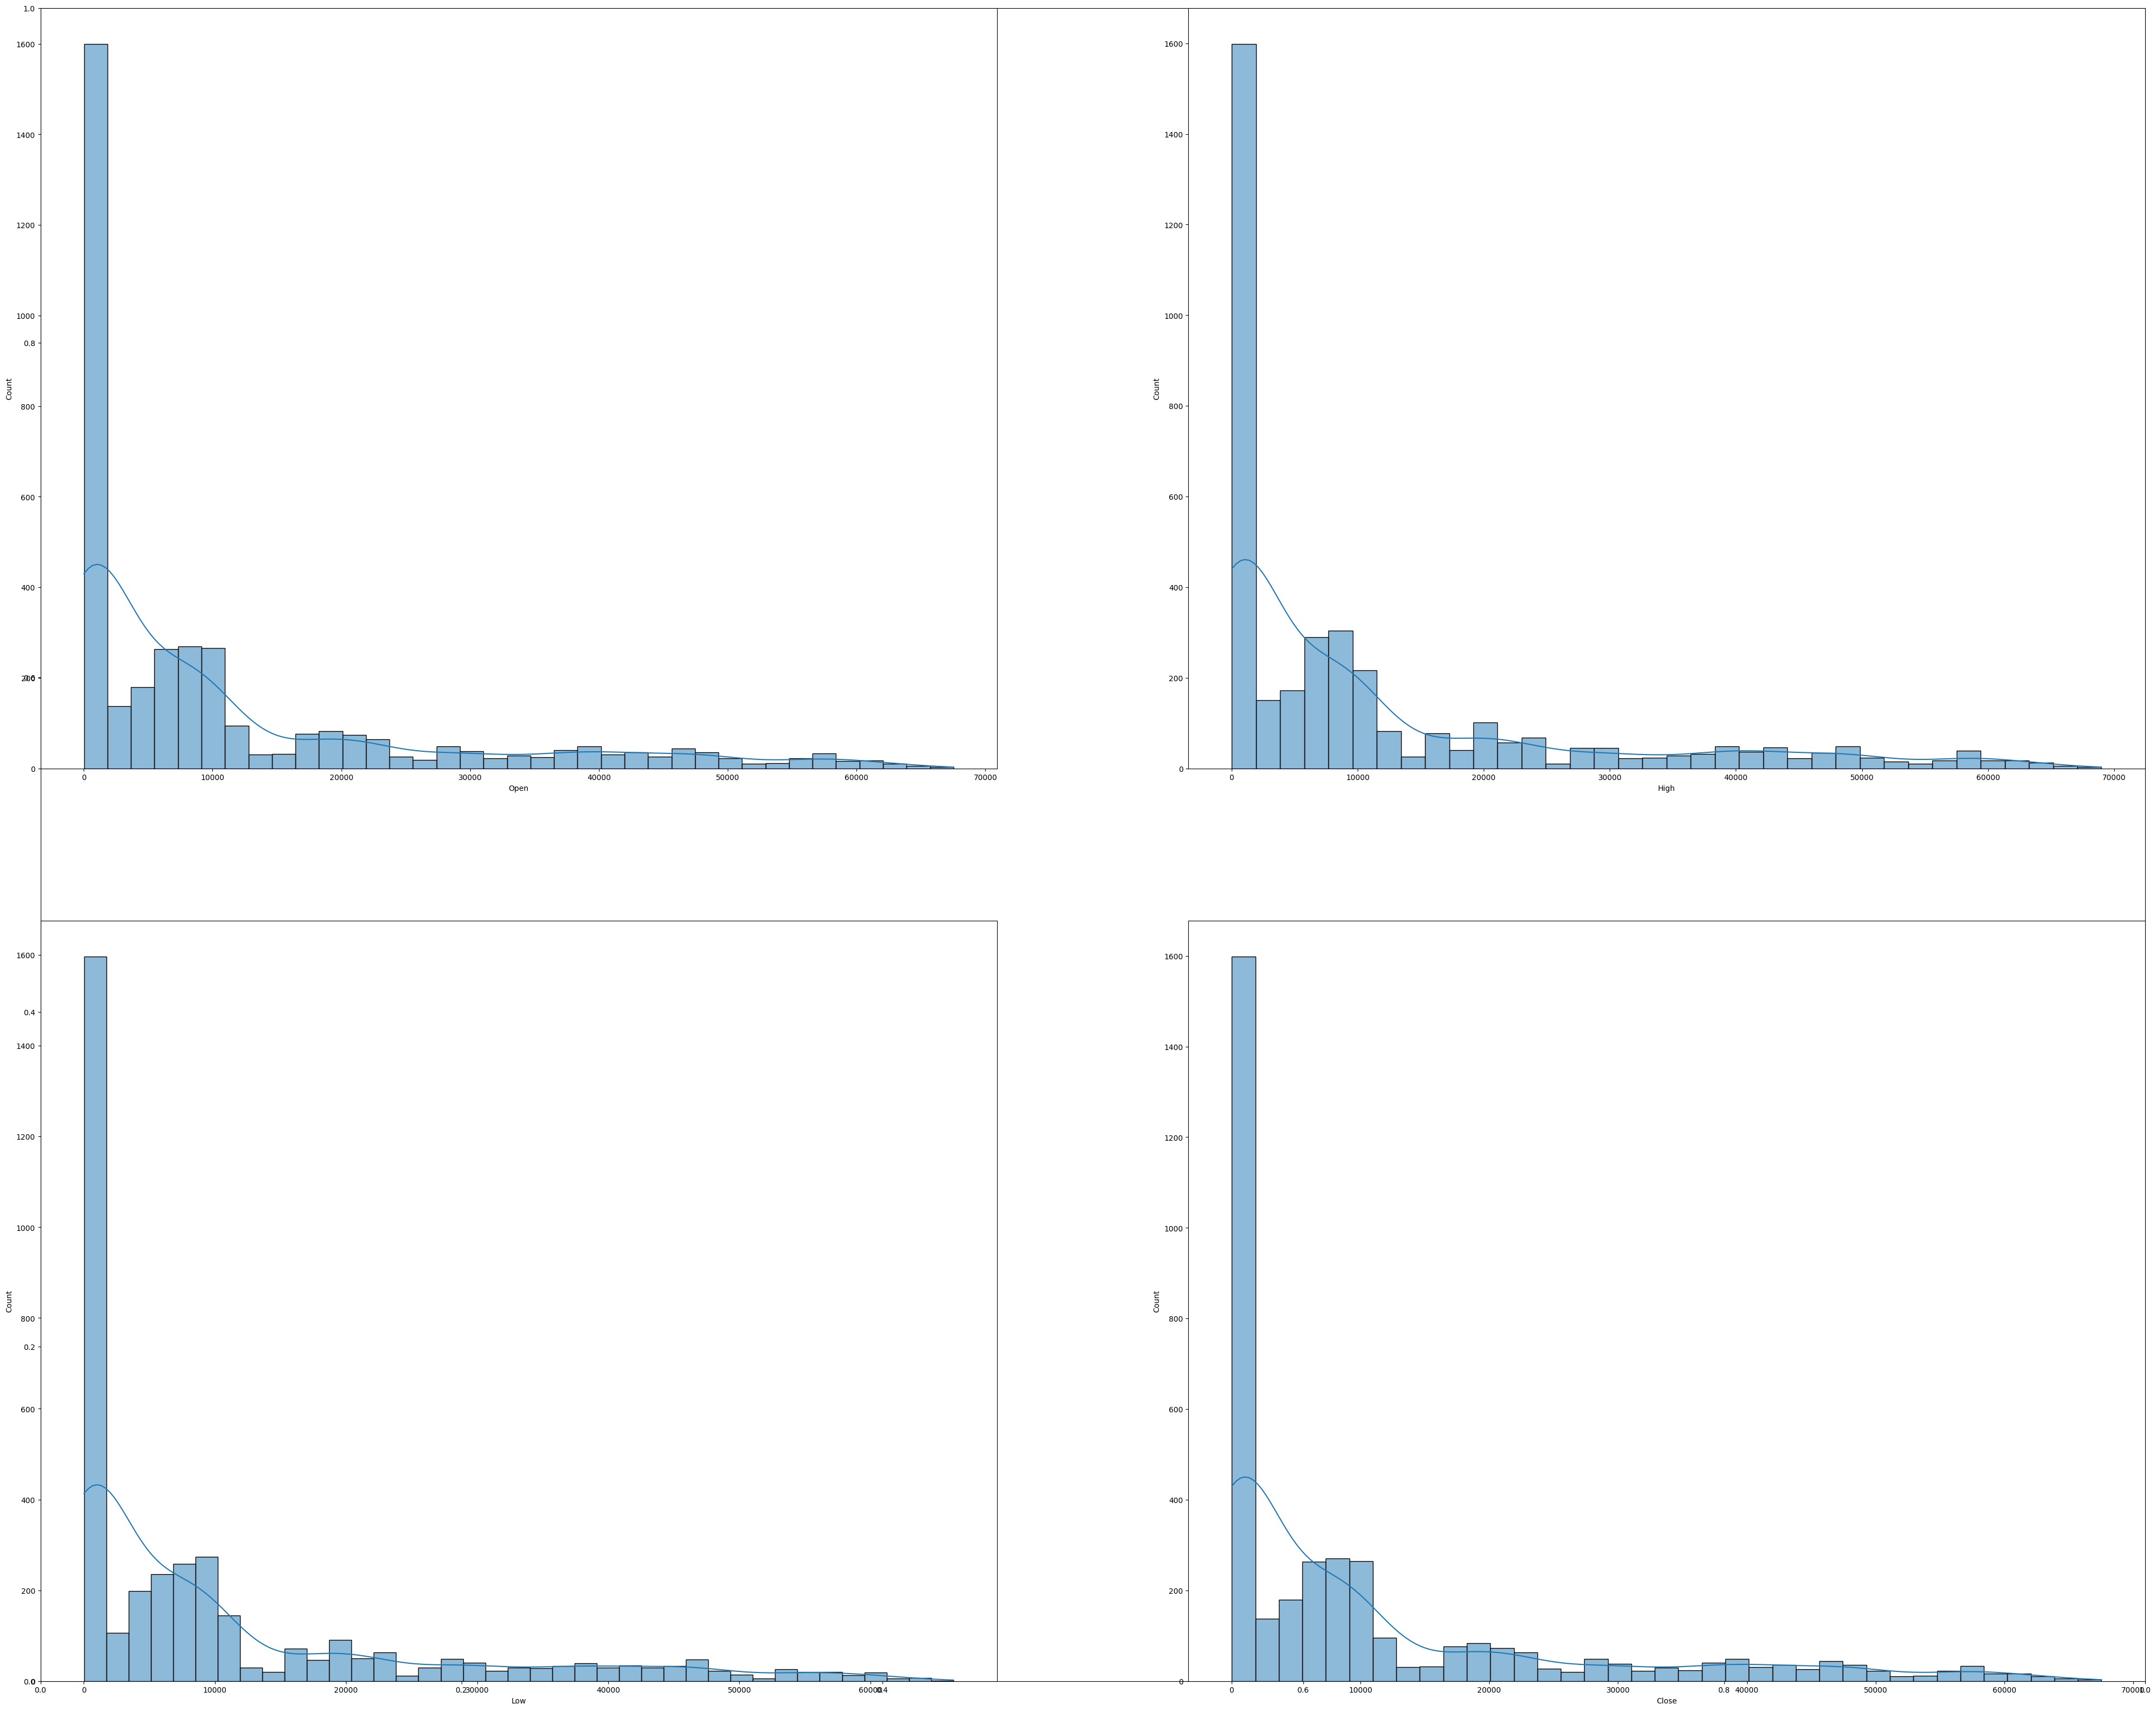

In [8]:
x=["Open","High","Low","Close"]
plt.close()
plt.subplots(figsize=(50,40))
for i,col in enumerate(x):
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True)
plt.show()

**Date Feature Extraction**

Extracting date parts/components

In [9]:
splitted=df["Date"].str.split("-",expand=True)
df["year"]=splitted[0].astype(int)
df["mounth"]=splitted[1].astype(int)
df["day"]=splitted[2].astype(int)

**Overview of dataset changes**

In [10]:
df.head()

,Date,Open,High,Low,Close,Vol.,year,mounth,day
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,2013,1,1
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,2013,1,2
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,2013,1,3
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,2013,1,4
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,2013,1,5


**Display**

Grouping years by their numeric values and displaying the table/chart

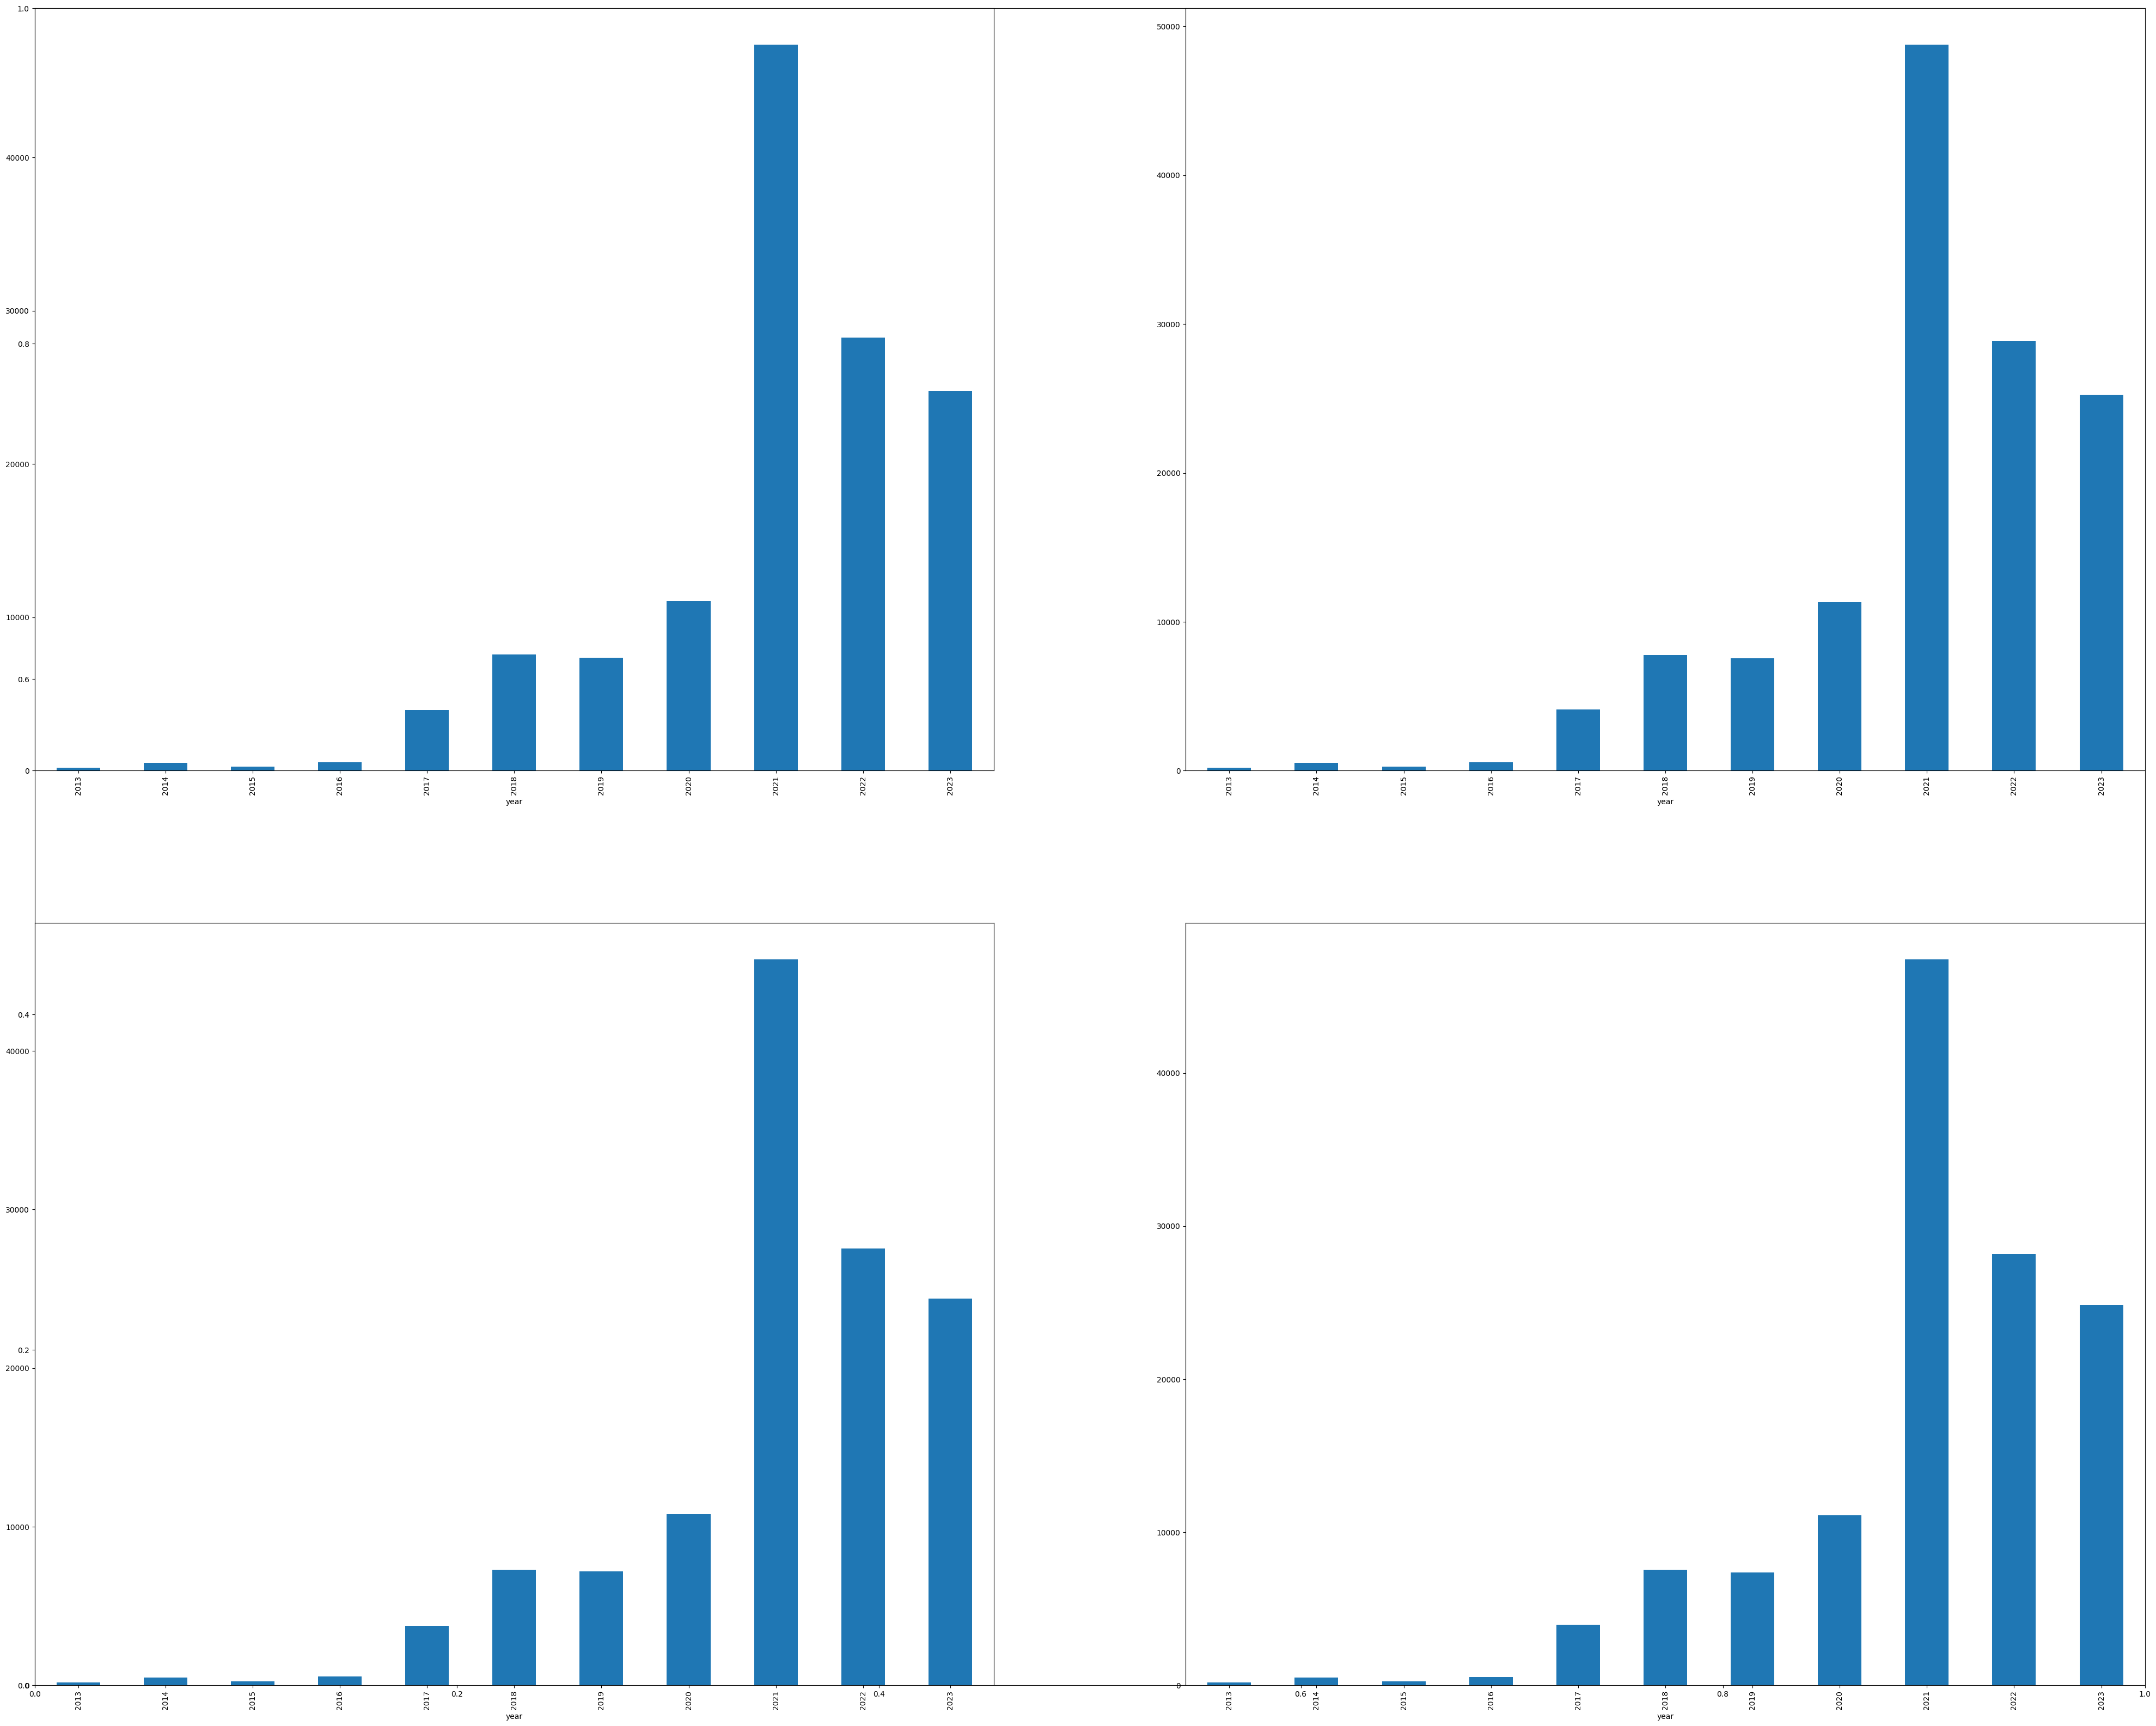

In [11]:
plt.close()
data_grouped = df.groupby("year").mean(numeric_only=True)
plt.subplots(figsize=(50,40))
for i,col in enumerate(["Open","High","Low","Close"]):
    plt.subplot(2,2,i+1)
    data_grouped[col].plot.bar()
plt.show()

**Identifying the last months of each quarter**

In [12]:
df["is_quarter_end"]=np.where(df["mounth"]%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Vol.,year,mounth,day,is_quarter_end
0,2013-01-01,13.5,13.6,13.2,13.3,28.41K,2013,1,1,0
1,2013-01-02,13.3,13.4,13.2,13.3,17.97K,2013,1,2,0
2,2013-01-03,13.3,13.5,13.3,13.4,18.03K,2013,1,3,0
3,2013-01-04,13.4,13.5,13.3,13.5,29.64K,2013,1,4,0
4,2013-01-05,13.5,13.6,13.3,13.4,21.33K,2013,1,5,0


**Creating output**

Creating output for the dataset and generating next-day closing price predictions

In [13]:
df["open_close"]=df["Open"]-df["Close"]
df["low_high"]=df["Low"]-df["High"]
df["target"]=np.where(df["Close"].shift(-1)>df["Close"],1,0)

**Output testing**

In [14]:
df["target"][1]

np.int64(1)

In [15]:
print(df["Close"][1],df["Close"].shift(-1)[1])

13.3 13.4


**Display**

Representing Price Movement as Binary Values: 1 for Increase, 0 for No Increase

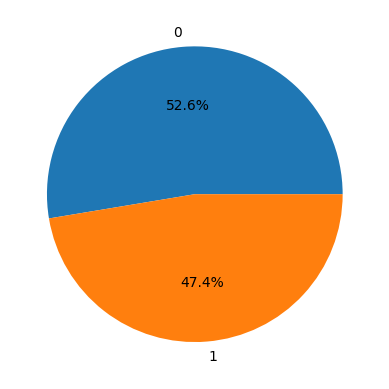

In [16]:
plt.close()
plt.pie(df["target"].value_counts().values,labels=[0,1],autopct="%1.1f%%")
plt.show()

**Body**

Defining Features (X) and Target (Y), Normalizing the Dataset, and Splitting it into Training and Testing sets

In [17]:
x=df[["open_close","low_high","is_quarter_end"]]
y=df["target"]
scaler=StandardScaler()
x=scaler.fit_transform(x)
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.04,random_state=2022)
print(X_train.shape,X_test.shape)

(3641, 3) (152, 3)


Evaluating the Performance of Different Algorithms for Prediction

In [18]:
RobotTest=[LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
for i in range(3):
    RobotTest[i].max_iter=1000000
    RobotTest[i].fit(X_train,y_train)
    print(f"{RobotTest[i]}:")
    print("Training Accuracy:",sm.roc_auc_score(y_train,RobotTest[i].predict_proba(X_train)[:,1]))
    print("Testing Accuracy:",sm.roc_auc_score(y_test,RobotTest[i].predict_proba(X_test)[:,1]))
    print()

LogisticRegression(max_iter=1000000):
Training Accuracy: 0.5343515354127467
Testing Accuracy: 0.5162855162855163

DecisionTreeClassifier():
Training Accuracy: 0.9999848700976847
Testing Accuracy: 0.5064102564102564

KNeighborsClassifier():
Training Accuracy: 0.7398567621888006
Testing Accuracy: 0.5966735966735968



Selecting the Best Algorithm and Training the Model on the Dataset

In [19]:
Robot=KNeighborsClassifier()
Robot.max_iter=100000000
Robot.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Predicting on the Test Set of the Dataset

In [20]:
Robot.predict(X_test)

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1])

In [21]:
y_test

2022    1
452     0
1023    1
73      0
2809    1
       ..
382     1
1157    0
1659    0
3038    0
1936    0
Name: target, Length: 152, dtype: int64

Percentage of Correct Predictions

In [22]:
Robot.score(X_test,y_test)

0.5986842105263158

**Conclusion**

In this project, a machine learning classification model was developed using historical Bitcoin price data to
 predict the future trend of Bitcoin prices. The model achieved an accuracy of approximately 59%, which indicates some predictive patterns in past data but is not yet reliable enough for standalone investment decisions.

To improve performance, incorporating additional features such as economic indicators, employing more advanced models like deep learning, and fine-tuning model parameters could be effective. Furthermore, using more robust evaluation techniques may enhance predictive accuracy.

Overall, this project serves as an initial yet important step towards leveraging AI methods for cryptocurrency market trend prediction and provides a foundation for future research and development.